In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 

In [2]:
class kinematic_property():
    def __init__(self, pt, eta, phi, mass):
        self.pt = pt
        self.eta = eta
        self.phi = phi
        self.mass = mass
        
class jet():
    def __init__(self, pt, eta, phi, mass):
        self.pt = pt
        self.eta = eta
        self.phi = phi
        self.mass = mass
        self.px = self.pt*np.cos(self.phi)
        self.py = self.pt*np.sin(self.phi)
        self.pz = self.pt*np.sinh(self.eta)
        self.e = np.sqrt(self.px**2 + self.py**2 + self.pz**2 + self.mass*2)

class parton():
    def __init__(self, pt, eta, phi, mass):
        self.pt = pt
        self.eta = eta
        self.phi = phi
        self.mass = mass
        self.px = self.pt*np.cos(self.phi)
        self.py = self.pt*np.sin(self.phi)
        self.pz = self.pt*np.sinh(self.eta)
        self.e = np.sqrt( self.px**2 + self.py**2 + self.pz**2 + self.mass*2)
        
class calc_helper():
    
    @staticmethod
    def four_vector_xyz(pt, eta, phi, mass):
        px = pt*np.cos(phi)
        py = pt*np.sin(phi)
        pz = pt*np.sinh(eta)
        e = np.sqrt(px**2 + py**2 + pz**2 + mass*2)
        return (px, py, pz, e)
    
    @staticmethod
    def dijet_inv(jet1, jet2):
        part_1 = (jet1.e + jet2.e)**2
        part_2 = (jet1.px + jet2.px)**2
        part_3 = (jet1.py + jet2.py)**2
        part_4 = (jet1.pz + jet2.pz)**2
        return np.sqrt( part_1 - part_2 - part_3 - part_4 )
    
    @staticmethod
    def trijet_inv(jet1, jet2, jet3):
        
        part_1 = (jet1.e + jet2.e + jet3.e)**2
        part_2 = (jet1.px + jet2.px + jet3.px)**2
        part_3 = (jet1.py + jet2.py + jet3.py)**2
        part_4 = (jet1.pz + jet2.pz + jet3.pz)**2
        return np.sqrt( part_1 - part_2 - part_3 - part_4 )
    
with np.load("../output/ttbar_output/event_record_chi2.npz", allow_pickle=True) as chi2:
    jet_parton_index_chi2 = chi2['jet_parton_index'][:]
    jet_chi2 = kinematic_property(chi2['jet_pt'][:], chi2['jet_eta'][:], chi2['jet_phi'][:], chi2['jet_mass'][:])
    parton_chi2 = kinematic_property(chi2['parton_pt'][:], chi2['parton_eta'][:], chi2['parton_phi'][:], chi2['parton_mass'][:])
    parton_jet_index_chi2 = chi2['parton_jet_index'][:]    
    N_match_top_in_event_chi2 = chi2['N_match_top_in_event'][:]    

with np.load("../output/ttbar_output/event_record_deltaR.npz", allow_pickle=True) as delta:
    jet_parton_index_del = delta['jet_parton_index'][:]
    jet_del = kinematic_property(delta['jet_pt'][:], delta['jet_eta'][:], delta['jet_phi'][:], delta['jet_mass'][:])
    parton_del = kinematic_property(delta['parton_pt'][:], delta['parton_eta'][:], delta['parton_phi'][:], delta['parton_mass'][:])
    parton_jet_index_del = delta['parton_jet_index'][:]        
    N_match_top_in_event_del = delta['N_match_top_in_event'][:]   


In [3]:
left_cand_chi2 = parton_jet_index_chi2[:,:3]
right_cand_chi2 = parton_jet_index_chi2[:,3:]
left_cand_del = parton_jet_index_del[:,:3]
right_cand_del = parton_jet_index_del[:,3:]

In [4]:
top_inv_chi2 = []

top_inv_del = []

top_inv_del_p = []

for i in range(len(parton_jet_index_del)):
    if N_match_top_in_event_del[i] == 2 and N_match_top_in_event_chi2[i] == 2:

        left_jet1_chi2 = jet(jet_chi2.pt[i][left_cand_chi2[i][0]], jet_chi2.eta[i][left_cand_chi2[i][0]], jet_chi2.phi[i][left_cand_chi2[i][0]], jet_chi2.mass[i][left_cand_chi2[i][0]])
        left_jet2_chi2 = jet(jet_chi2.pt[i][left_cand_chi2[i][1]], jet_chi2.eta[i][left_cand_chi2[i][1]], jet_chi2.phi[i][left_cand_chi2[i][1]], jet_chi2.mass[i][left_cand_chi2[i][1]])
        left_jet3_chi2 = jet(jet_chi2.pt[i][left_cand_chi2[i][2]], jet_chi2.eta[i][left_cand_chi2[i][2]], jet_chi2.phi[i][left_cand_chi2[i][2]], jet_chi2.mass[i][left_cand_chi2[i][2]])
        right_jet1_chi2 = jet(jet_chi2.pt[i][right_cand_chi2[i][0]], jet_chi2.eta[i][right_cand_chi2[i][0]], jet_chi2.phi[i][right_cand_chi2[i][0]], jet_chi2.mass[i][right_cand_chi2[i][0]])
        right_jet2_chi2 = jet(jet_chi2.pt[i][right_cand_chi2[i][1]], jet_chi2.eta[i][right_cand_chi2[i][1]], jet_chi2.phi[i][right_cand_chi2[i][1]], jet_chi2.mass[i][right_cand_chi2[i][1]])
        right_jet3_chi2 = jet(jet_chi2.pt[i][right_cand_chi2[i][2]], jet_chi2.eta[i][right_cand_chi2[i][2]], jet_chi2.phi[i][right_cand_chi2[i][2]], jet_chi2.mass[i][right_cand_chi2[i][2]])

        top_inv_chi2.append(calc_helper.trijet_inv(left_jet1_chi2, left_jet2_chi2, left_jet3_chi2))
        top_inv_chi2.append(calc_helper.trijet_inv(right_jet1_chi2, right_jet2_chi2, right_jet3_chi2))

        left_jet1_del = jet(jet_del.pt[i][int(left_cand_del[i][0])], jet_del.eta[i][int(left_cand_del[i][0])], jet_del.phi[i][int(left_cand_del[i][0])], jet_del.mass[i][int(left_cand_del[i][0])])
        left_jet2_del = jet(jet_del.pt[i][int(left_cand_del[i][1])], jet_del.eta[i][int(left_cand_del[i][1])], jet_del.phi[i][int(left_cand_del[i][1])], jet_del.mass[i][int(left_cand_del[i][1])])
        left_jet3_del = jet(jet_del.pt[i][int(left_cand_del[i][2])], jet_del.eta[i][int(left_cand_del[i][2])], jet_del.phi[i][int(left_cand_del[i][2])], jet_del.mass[i][int(left_cand_del[i][2])])
        right_jet1_del = jet(jet_del.pt[i][int(right_cand_del[i][0])], jet_del.eta[i][int(right_cand_del[i][0])], jet_del.phi[i][int(right_cand_del[i][0])], jet_del.mass[i][int(right_cand_del[i][0])])
        right_jet2_del = jet(jet_del.pt[i][int(right_cand_del[i][1])], jet_del.eta[i][int(right_cand_del[i][1])], jet_del.phi[i][int(right_cand_del[i][1])], jet_del.mass[i][int(right_cand_del[i][1])])
        right_jet3_del = jet(jet_del.pt[i][int(right_cand_del[i][2])], jet_del.eta[i][int(right_cand_del[i][2])], jet_del.phi[i][int(right_cand_del[i][2])], jet_del.mass[i][int(right_cand_del[i][2])])

        top_inv_del.append(calc_helper.trijet_inv(left_jet1_del, left_jet2_del, left_jet3_del))
        top_inv_del.append(calc_helper.trijet_inv(right_jet1_del, right_jet2_del, right_jet3_del))
        
        left_parton_del_1 = parton(parton_del.pt[i][0], parton_del.eta[i][0], parton_del.phi[i][0], parton_del.mass[i][0])
        left_parton_del_2 = parton(parton_del.pt[i][1], parton_del.eta[i][1], parton_del.phi[i][1], parton_del.mass[i][1])
        left_parton_del_3 = parton(parton_del.pt[i][2], parton_del.eta[i][2], parton_del.phi[i][2], parton_del.mass[i][2])
        right_parton_del_1 = parton(parton_del.pt[i][3], parton_del.eta[i][3], parton_del.phi[i][3], parton_del.mass[i][3])
        right_parton_del_2 = parton(parton_del.pt[i][4], parton_del.eta[i][4], parton_del.phi[i][4], parton_del.mass[i][4])
        right_parton_del_3 = parton(parton_del.pt[i][5], parton_del.eta[i][5], parton_del.phi[i][5], parton_del.mass[i][5])
        
        top_inv_del_p.append(calc_helper.trijet_inv(left_parton_del_1, left_parton_del_2, left_parton_del_3))
        top_inv_del_p.append(calc_helper.trijet_inv(right_parton_del_1, right_parton_del_2, right_parton_del_3))
        

In [5]:
def plot_fn(line_1, line_2):
    plt.figure(figsize=(10,8))
    plt.hist(line_1, range=(100, 250), bins=50, label='Invariant mass of reconstructed top(chi2).', histtype="stepfilled", stacked=True, alpha=0.5)
    plt.hist(line_2, range=(100, 250), bins=50, label='Invariant mass of reconstructed top(delta_R).', histtype="stepfilled", stacked=True, alpha=0.5)
    plt.legend(loc='upper right')
    plt.xlabel("Invariant mass(GeV)")
    plt.ylabel("NUmber of events.")
    plt.title(r'Invariant mass distribution of $\chi^{2}$ reconstruction')

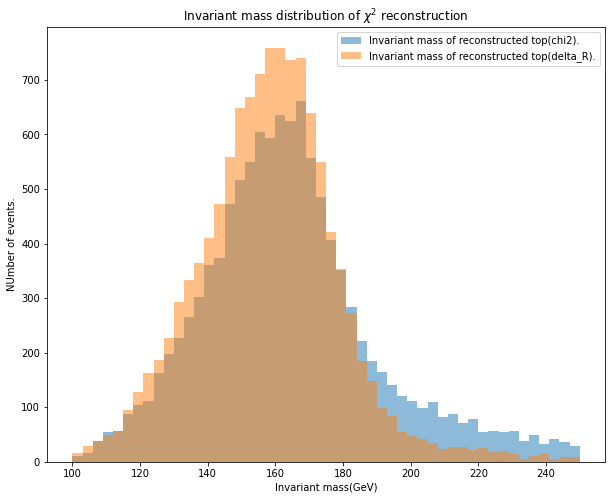

In [6]:
plot_fn(top_inv_chi2, top_inv_del)

Text(0.5, 1.0, 'Invariant mass distribution of $\\chi^{2}$ reconstruction')

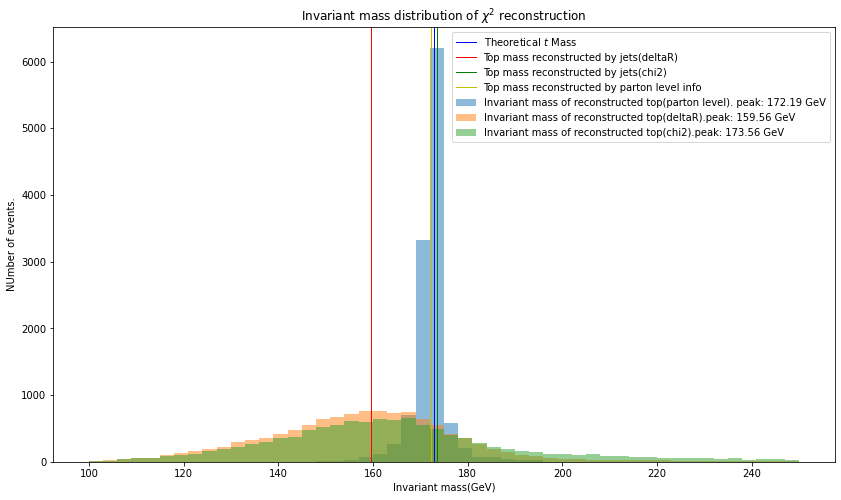

In [7]:
plt.figure(figsize=(14,8))
plt.hist(top_inv_del_p, range=(100, 250), bins=50, label=f'Invariant mass of reconstructed top(parton level). peak: {np.around(np.mean(top_inv_del_p), decimals=2)} GeV', histtype="stepfilled", stacked=True, alpha=0.5)
plt.hist(top_inv_del, range=(100, 250), bins=50, label=f'Invariant mass of reconstructed top(deltaR).peak: {np.around(np.mean(top_inv_del), decimals=2)} GeV', histtype="stepfilled", stacked=True, alpha=0.5)
plt.hist(top_inv_chi2, range=(100, 250), bins=50, label=f'Invariant mass of reconstructed top(chi2).peak: {np.around(np.mean(top_inv_chi2), decimals=2)} GeV', histtype="stepfilled", stacked=True, alpha=0.5)
plt.axvline(173, color='b', label="Theoretical $t$ Mass", linewidth=1)
plt.axvline(np.around(np.mean(top_inv_del), decimals=2), color='r', label="Top mass reconstructed by jets(deltaR)", linewidth=1)
plt.axvline(np.around(np.mean(top_inv_chi2), decimals=2), color='g', label="Top mass reconstructed by jets(chi2)", linewidth=1)
plt.axvline(np.around(np.mean(top_inv_del_p), decimals=2), color='y', label="Top mass reconstructed by parton level info", linewidth=1)
plt.legend(loc='upper right')
plt.xlabel("Invariant mass(GeV)")
plt.ylabel("NUmber of events.")

plt.title(r'Invariant mass distribution of $\chi^{2}$ reconstruction')

In [9]:
parton_jet_index_del[0]

array([4, 3, 6, 0, 2, 5], dtype=object)

In [10]:
jet_parton_index_del[0]

array([3.0, 'nan', 4.0, 1.0, 0.0, 5.0, 2.0], dtype=object)